# <b> Natural Language Processing - Leaf by Niggle

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import math
import nltk
import tensorflow_datasets as tfds
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
stop_words = stopwords.words('english')
from nltk import sent_tokenize, word_tokenize

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### <b> Load Data

In [2]:
# load text
path = '../data/Niggle/niggle.txt'
file = open(path, 'rt')
book = file.read()
file.close()

In [3]:
book[0:1000]

'There was once a little man called Niggle, who had a long journey to make. He did not want to go, indeed the whole idea was distasteful to him; but he could not get out of it. He knew he would have to start some time, but he did not hurry with his preparations.\n\nNiggle was a painter. Not a very successful one, partly because he had many other things to do. Most of these things he thought were a nuisance; but he did them fairly well, when he could not get out of them: which (in his opinion) was far too often. The laws in his country were rather strict. There were other hindrances, too. For one thing, he was sometimes just idle, and did nothing at all. For another, he was kind-hearted, in a way. You know the sort of kind heart: it made him uncomfortable more often than it made him do anything; and even when he did anything, it did not prevent him from grumbling, losing his temper, and swearing (mostly to himself). All the same, it did land him in a good many odd jobs for his neighbour

## <b> Data Cleaning 

Most Common Approaches:

* Load the raw text.
    
* Split into tokens.
    
* Convert to lowercase.
    
* Remove punctuation from each token.
    
* Filter out remaining tokens that are not alphabetic.
    
* Filter out tokens that are stop words

In [4]:
# split into words by white space
words = book.split()
print(words[:100])

['There', 'was', 'once', 'a', 'little', 'man', 'called', 'Niggle,', 'who', 'had', 'a', 'long', 'journey', 'to', 'make.', 'He', 'did', 'not', 'want', 'to', 'go,', 'indeed', 'the', 'whole', 'idea', 'was', 'distasteful', 'to', 'him;', 'but', 'he', 'could', 'not', 'get', 'out', 'of', 'it.', 'He', 'knew', 'he', 'would', 'have', 'to', 'start', 'some', 'time,', 'but', 'he', 'did', 'not', 'hurry', 'with', 'his', 'preparations.', 'Niggle', 'was', 'a', 'painter.', 'Not', 'a', 'very', 'successful', 'one,', 'partly', 'because', 'he', 'had', 'many', 'other', 'things', 'to', 'do.', 'Most', 'of', 'these', 'things', 'he', 'thought', 'were', 'a', 'nuisance;', 'but', 'he', 'did', 'them', 'fairly', 'well,', 'when', 'he', 'could', 'not', 'get', 'out', 'of', 'them:', 'which', '(in', 'his', 'opinion)', 'was']


In [5]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
# remove punctuation from each word
# split into words by white space
words = book.split()
words =  [w for w in words if w.isalpha()]
print(words[0:100])

['There', 'was', 'once', 'a', 'little', 'man', 'called', 'who', 'had', 'a', 'long', 'journey', 'to', 'He', 'did', 'not', 'want', 'to', 'indeed', 'the', 'whole', 'idea', 'was', 'distasteful', 'to', 'but', 'he', 'could', 'not', 'get', 'out', 'of', 'He', 'knew', 'he', 'would', 'have', 'to', 'start', 'some', 'but', 'he', 'did', 'not', 'hurry', 'with', 'his', 'Niggle', 'was', 'a', 'Not', 'a', 'very', 'successful', 'partly', 'because', 'he', 'had', 'many', 'other', 'things', 'to', 'Most', 'of', 'these', 'things', 'he', 'thought', 'were', 'a', 'but', 'he', 'did', 'them', 'fairly', 'when', 'he', 'could', 'not', 'get', 'out', 'of', 'which', 'his', 'was', 'far', 'too', 'The', 'laws', 'in', 'his', 'country', 'were', 'rather', 'There', 'were', 'other', 'For', 'one', 'he']


In [7]:
# convert to lower case
words = [word.lower() for word in words]
print(words[0:100])

['there', 'was', 'once', 'a', 'little', 'man', 'called', 'who', 'had', 'a', 'long', 'journey', 'to', 'he', 'did', 'not', 'want', 'to', 'indeed', 'the', 'whole', 'idea', 'was', 'distasteful', 'to', 'but', 'he', 'could', 'not', 'get', 'out', 'of', 'he', 'knew', 'he', 'would', 'have', 'to', 'start', 'some', 'but', 'he', 'did', 'not', 'hurry', 'with', 'his', 'niggle', 'was', 'a', 'not', 'a', 'very', 'successful', 'partly', 'because', 'he', 'had', 'many', 'other', 'things', 'to', 'most', 'of', 'these', 'things', 'he', 'thought', 'were', 'a', 'but', 'he', 'did', 'them', 'fairly', 'when', 'he', 'could', 'not', 'get', 'out', 'of', 'which', 'his', 'was', 'far', 'too', 'the', 'laws', 'in', 'his', 'country', 'were', 'rather', 'there', 'were', 'other', 'for', 'one', 'he']


In [8]:
# remove stopwords
stop_words = stopwords.words('english')
words = [w for w in words if w not in stop_words]
print(words[:100])

['little', 'man', 'called', 'long', 'journey', 'want', 'indeed', 'whole', 'idea', 'distasteful', 'could', 'get', 'knew', 'would', 'start', 'hurry', 'niggle', 'successful', 'partly', 'many', 'things', 'things', 'thought', 'fairly', 'could', 'get', 'far', 'laws', 'country', 'rather', 'one', 'sometimes', 'nothing', 'know', 'sort', 'kind', 'made', 'uncomfortable', 'often', 'made', 'even', 'prevent', 'losing', 'swearing', 'land', 'good', 'many', 'odd', 'jobs', 'man', 'lame', 'occasionally', 'even', 'helped', 'people', 'came', 'asked', 'remembered', 'began', 'pack', 'things', 'ineffectual', 'times', 'paint', 'number', 'pictures', 'large', 'ambitious', 'sort', 'painter', 'paint', 'leaves', 'better', 'used', 'spend', 'long', 'time', 'single', 'trying', 'catch', 'glistening', 'dewdrops', 'yet', 'wanted', 'paint', 'whole', 'leaves', 'one', 'picture', 'particular', 'bothered', 'begun', 'leaf', 'caught', 'became', 'tree', 'sending', 'innumerable', 'thrusting', 'fantastic']


In [9]:
book_clean = ' '.join(words)

In [10]:
book_clean[0:1000]

'little man called long journey want indeed whole idea distasteful could get knew would start hurry niggle successful partly many things things thought fairly could get far laws country rather one sometimes nothing know sort kind made uncomfortable often made even prevent losing swearing land good many odd jobs man lame occasionally even helped people came asked remembered began pack things ineffectual times paint number pictures large ambitious sort painter paint leaves better used spend long time single trying catch glistening dewdrops yet wanted paint whole leaves one picture particular bothered begun leaf caught became tree sending innumerable thrusting fantastic strange birds came settled twigs attended round behind gaps leaves country began open glimpses forest marching mountains tipped niggle lost interest else took tacked edges great soon canvas became large get ran putting touch rubbing patch people came seemed polite though fiddled little pencils listened underneath thinking 

### <b> TFIDF
    
    * TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
    * IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate CountVectorizer()
cv=CountVectorizer(stop_words='english')

In [12]:
docs = book_clean.split()

In [13]:
def _tf_idf_(docs):
     
    # this steps generates word counts for the words in your docs
    word_count_vector=cv.fit_transform(docs)
    
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)

    df = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["TFIDF"])
    df =  df.sort_values(by=['TFIDF'], ascending=False)

    return df

In [14]:
tf_idf = _tf_idf_(docs)

In [15]:
tf_idf.head()

,TFIDF
main,8.041412
patient,8.041412
organs,8.041412
overwhelmed,8.041412
pack,8.041412


### <b> Histograms

In [16]:
def WordCloud(text):
    from wordcloud import WordCloud
    #word_join = ' '.join(text.tolist())
    frequency = nltk.FreqDist(word_tokenize(text))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [17]:
def WordFrequency(docs, quant_words):
    words_df = pd.DataFrame()
    N = len(docs) # for normalization
    text = nltk.FreqDist(word_tokenize(docs))
    
    words_df['words'] = text.keys()
    words_df['freq'] = text.values()

    words_df['norm'] = [x/N for x in words_df['freq']]
    top_words = words_df.sort_values(by = 'freq', ascending=False).head(quant_words)

    return top_words

In [18]:
freq = WordFrequency(book_clean, 20)
freq.head()

,words,freq,norm
130,said,72,0.004930
16,niggle,64,0.004382
10,could,37,0.002533
188,parish,28,0.001917
13,would,24,0.001643


<BarContainer object of 20 artists>

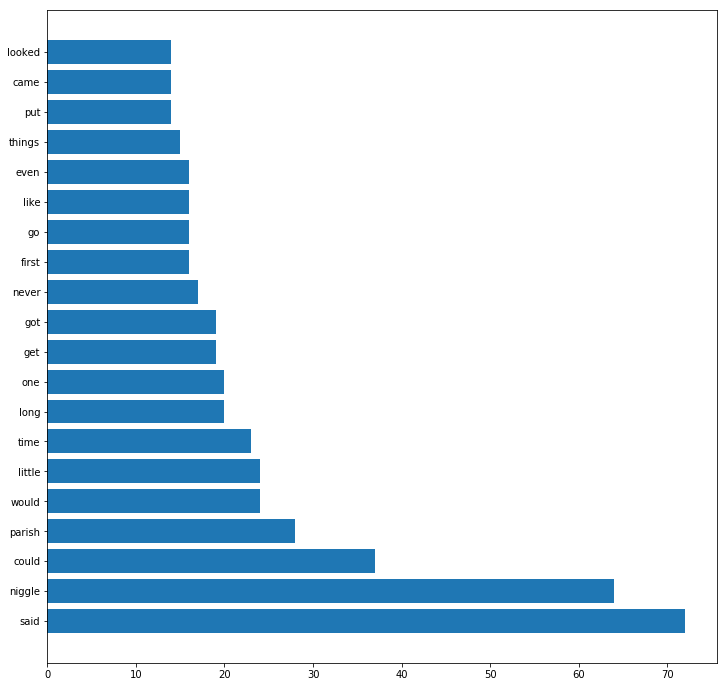

In [19]:
plt.figure(figsize=(12,12))
plt.barh(y = 'words', width = 'freq', data = freq)

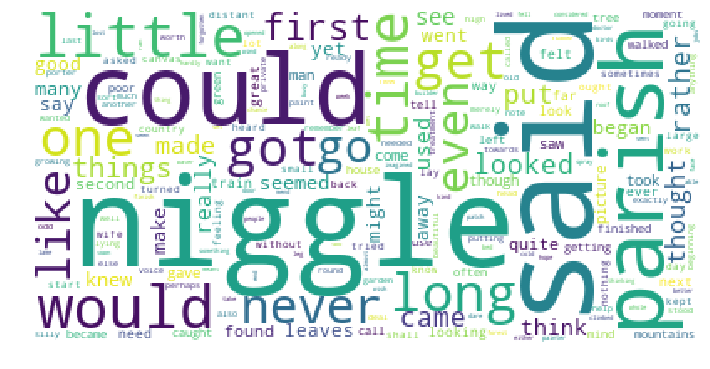

In [20]:
WordCloud(book_clean)

### <b> POS Tag


In [21]:
from nltk import RegexpParser

In [22]:
words = word_tokenize(book_clean)
words = [w for w in words if w.isalpha()]
words = [w for w in words if w not in stop_words]
words = [w.lower() for w in words]
print(words[0:10])

['little', 'man', 'called', 'long', 'journey', 'want', 'indeed', 'whole', 'idea', 'distasteful']


In [23]:
pos_words = nltk.pos_tag(words)
print(pos_words[0:10])

[('little', 'JJ'), ('man', 'NN'), ('called', 'VBN'), ('long', 'RB'), ('journey', 'NN'), ('want', 'VBP'), ('indeed', 'RB'), ('whole', 'JJ'), ('idea', 'NN'), ('distasteful', 'NN')]


#### <b> NOUNS

In [24]:
nn_tagged = [(word) for word, tag in pos_words
                if tag.startswith('NN')]

In [25]:
print(nn_tagged[0:10])

['man', 'journey', 'idea', 'distasteful', 'knew', 'things', 'things', 'laws', 'country', 'nothing']


In [26]:
# tokens to text
nns = ' '.join(nn_tagged)

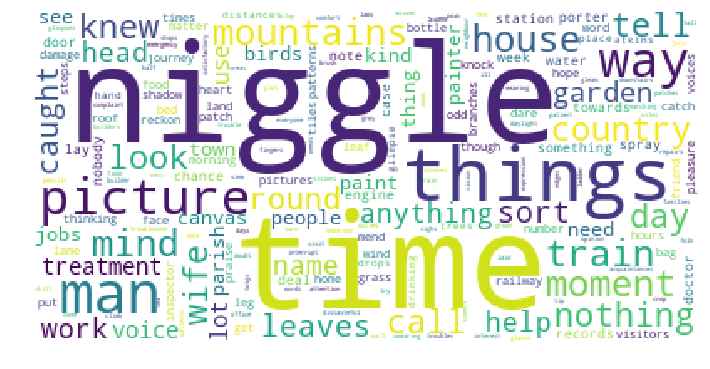

In [27]:
WordCloud(nns)

#### <b> VERBS

In [28]:
vb_tagged = [(word) for word, tag in pos_words
                if tag.startswith('VBG')]

In [29]:
print(vb_tagged[0:10])

['losing', 'trying', 'glistening', 'sending', 'thrusting', 'putting', 'beginning', 'growing', 'getting', 'trying']


In [30]:
# tokens to text
vbs = ' '.join(vb_tagged)

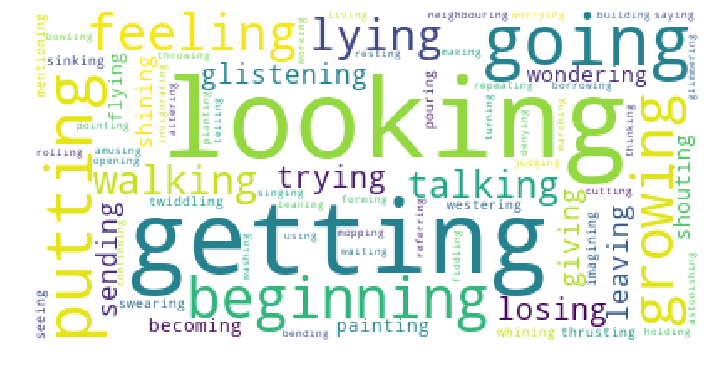

In [31]:
WordCloud(vbs)

#### <b> ADJECTIVES

In [32]:
adj_tagged = [(word) for word, tag in pos_words
                if tag.startswith('JJ')]

In [33]:
print(adj_tagged[0:10])

['little', 'whole', 'successful', 'many', 'know', 'uncomfortable', 'prevent', 'good', 'many', 'pack']


In [34]:
# tokens to text
adj = ' '.join(adj_tagged)

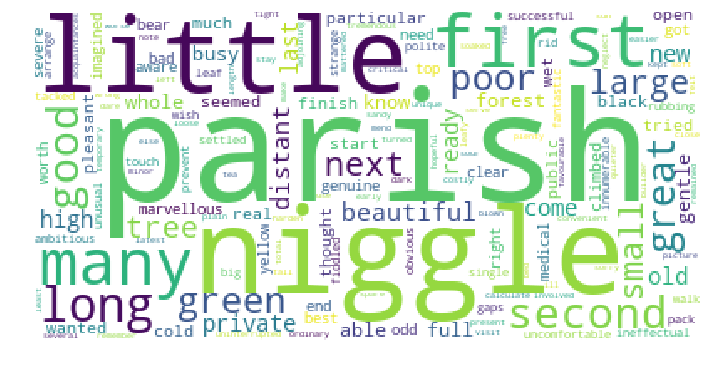

In [35]:
WordCloud(adj)